Loading necessary Libraries

In [1]:
import os 
import torch
import torchvision
from torch import nn 


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Train,Test path

In [3]:
train_dir = "data\\retinal_oct\\train"
test_dir = "data\\retinal_oct\\test"
test_dir, train_dir

('data\\retinal_oct\\test', 'data\\retinal_oct\\train')

Printing classnames

In [4]:
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['CNV', 'DME', 'DRUSEN', 'NORMAL']
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

Creating data transforms

In [6]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [7]:
data_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

Turning images into pytorch tensors

In [8]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                    transform= data_transform,
                                    target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                    transform=data_transform,
                                    target_transform=None)

print(f"Train data: \n{train_data}\n Test data: \n {test_data}")

Train data: 
Dataset ImageFolder
    Number of datapoints: 13720
    Root location: data\retinal_oct\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data: 
 Dataset ImageFolder
    Number of datapoints: 973
    Root location: data\retinal_oct\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [9]:
class_names = train_data.classes
class_names

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0000, 0.0510, 0.0314,  ..., 0.0510, 0.0431, 0.0078],
         [0.0471, 0.0745, 0.0745,  ..., 0.0627, 0.0588, 0.0275],
         [0.0980, 0.0667, 0.0863,  ..., 0.0745, 0.0745, 0.0392],
         ...,
         [0.0196, 0.0235, 0.0235,  ..., 0.0353, 0.0235, 0.0000],
         [0.0235, 0.0235, 0.0275,  ..., 0.0314, 0.0196, 0.0000],
         [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0157, 0.0000]],

        [[0.0000, 0.0510, 0.0314,  ..., 0.0510, 0.0431, 0.0078],
         [0.0471, 0.0745, 0.0745,  ..., 0.0627, 0.0588, 0.0275],
         [0.0980, 0.0667, 0.0863,  ..., 0.0745, 0.0745, 0.0392],
         ...,
         [0.0196, 0.0235, 0.0235,  ..., 0.0353, 0.0235, 0.0000],
         [0.0235, 0.0235, 0.0275,  ..., 0.0314, 0.0196, 0.0000],
         [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0157, 0.0000]],

        [[0.0000, 0.0510, 0.0314,  ..., 0.0510, 0.0431, 0.0078],
         [0.0471, 0.0745, 0.0745,  ..., 0.0627, 0.0588, 0.0275],
         [0.0980, 0.0667, 0.0863,  ..., 0.07

In [12]:
image_permute = img.permute(1,2,0)
print(f"Original shape: {img.shape}")
print(f"Permuted shape: {image_permute.shape}")


Original shape: torch.Size([3, 224, 224])
Permuted shape: torch.Size([224, 224, 3])


Text(0.5, 1.0, 'CNV')

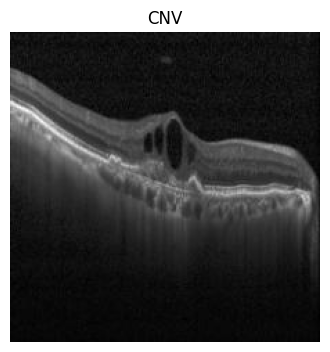

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,5))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label])

Turning dataset into dataloaders


In [14]:
batch_size = 8
num_workers = os.cpu_count()

from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=8,
                                num_workers=num_workers,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=8,
                                num_workers=num_workers,
                                shuffle=False)

In [15]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2320bbef7f0>,
 <torch.utils.data.dataloader.DataLoader at 0x2320bbee650>)

In [16]:
# Create training and testing DataLoaders as well as get a list of class names
import src.data_setup as data_setup
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                test_dir=test_dir,
                                                                                transform=data_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                                batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2321422bd30>,
 ['CNV', 'DME', 'DRUSEN', 'NORMAL'])

In [17]:
img, label = next(iter(train_dataloader))


print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


In [18]:
train_data.classes , train_data.class_to_idx

(['CNV', 'DME', 'DRUSEN', 'NORMAL'],
 {'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3})

Data augmentation

In [19]:
from torchvision.transforms import Compose, Resize, RandomHorizontalFlip, ToTensor, Normalize
from PIL import Image

train_data_augmented = transforms.Compose([
    transforms.Resize((224,224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_data_augmented = transforms.Compose([
    transforms.Resize((224,224), interpolation=Image.BILINEAR),
    transforms.ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
train_data_augmented, test_data_augmented

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ))

In [21]:
from torchvision.datasets import ImageFolder
train_data_augmented = ImageFolder(root='data\\retinal_oct\\train', transform=train_data_augmented)
test_data_augmented = ImageFolder(root='data\\retinal_oct\\train', transform=test_data_augmented)

In [22]:
import os 
batch_size = 8
num_workers = os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        num_workers=num_workers)

test_dataloader_augmented = DataLoader(test_data_augmented,
                                    batch_size=batch_size,
                                    shuffle=False,
                                    num_workers=num_workers)

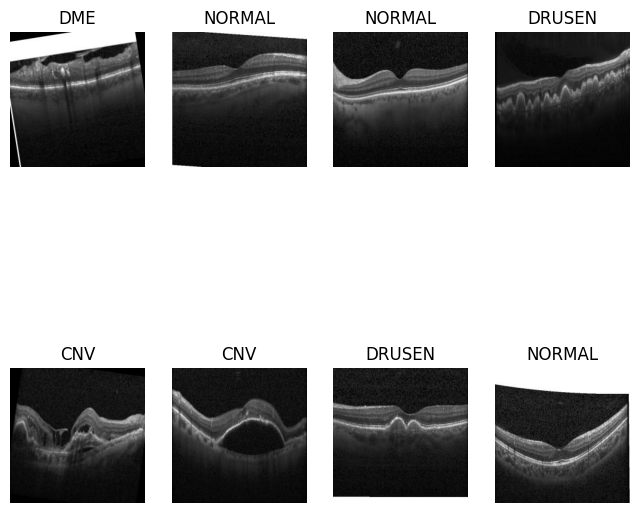

In [23]:
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=4)
    for i in range(8):
        ax = axes[i // 4, i % 4]
        img = images[i].permute(1, 2, 0)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[labels[i]])
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_dataloader))

# Show images
show_images(images, labels, class_names)


In [24]:
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

Optic Model architecture

In [25]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [26]:
weights = torchvision.models.ResNet50_Weights.DEFAULT
model = torchvision.models.resnet50(weights=weights).to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [27]:
from torchinfo import summary

summary(model=model, 
        input_size=(8, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 1000]            --                   True
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    128                  True
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      4,096                True
│    │    └─BatchN

In [28]:
#Freeze all layers
for param in model.parameters():
    param.requires_grad = False

In [29]:
# Unfreeze last layer
for param in model.fc.parameters():
    param.requires_grad = True

In [30]:
summary(model=model, 
        input_size=(8, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 1000]            --                   Partial
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   False
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      (4,096)              False
│    │    

In [31]:
import torch
import torch.nn as nn
import torchvision.models as models

def resnet_output(num_classes):
    model = models.resnet50(pretrained=True)

    input_size = model.fc.in_features

    # Defining the new output layer
    new_fc = nn.Linear(input_size, num_classes)

    # Replacing the existing output layer with the new one
    model.fc = new_fc

    return model

# Example usage:
num_classes = 4  # Example number of classes
model = resnet_output(num_classes)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
summary(model, 
        input_size=(8, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [8, 3, 224, 224]     [8, 4]               --                   True
├─Conv2d (conv1)                         [8, 3, 224, 224]     [8, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [8, 64, 112, 112]    [8, 64, 112, 112]    128                  True
├─ReLU (relu)                            [8, 64, 112, 112]    [8, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [8, 64, 112, 112]    [8, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    └─Bottleneck (0)                    [8, 64, 56, 56]      [8, 256, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [8, 64, 56, 56]      [8, 64, 56, 56]      4,096                True
│    │    └─BatchN

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))

Training the model

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import src.engine as engine
from timeit import default_timer as timer 

start_time = timer()
results = engine.train(model=model,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20,
                        device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.267 | train_acc: 0.408 | test_loss: 1.268 | test_acc: 0.456


  5%|▌         | 1/20 [06:51<2:10:12, 411.21s/it]

Epoch: 2 | train_loss: 0.905 | train_acc: 0.617 | test_loss: 0.719 | test_acc: 0.753


 10%|█         | 2/20 [13:29<2:01:04, 403.58s/it]

Epoch: 3 | train_loss: 0.669 | train_acc: 0.739 | test_loss: 0.482 | test_acc: 0.833


 15%|█▌        | 3/20 [20:05<1:53:20, 400.01s/it]

Epoch: 4 | train_loss: 0.559 | train_acc: 0.785 | test_loss: 0.307 | test_acc: 0.895


 20%|██        | 4/20 [26:44<1:46:35, 399.74s/it]

Epoch: 5 | train_loss: 0.496 | train_acc: 0.812 | test_loss: 0.351 | test_acc: 0.885


 25%|██▌       | 5/20 [33:21<1:39:41, 398.78s/it]

Epoch: 6 | train_loss: 0.470 | train_acc: 0.828 | test_loss: 0.267 | test_acc: 0.910


 30%|███       | 6/20 [39:59<1:32:59, 398.53s/it]

Epoch: 7 | train_loss: 0.435 | train_acc: 0.839 | test_loss: 0.270 | test_acc: 0.908


 35%|███▌      | 7/20 [46:33<1:26:02, 397.10s/it]

Epoch: 8 | train_loss: 0.419 | train_acc: 0.844 | test_loss: 0.247 | test_acc: 0.921


 40%|████      | 8/20 [53:18<1:19:56, 399.67s/it]

Epoch: 9 | train_loss: 0.394 | train_acc: 0.855 | test_loss: 0.211 | test_acc: 0.930


 45%|████▌     | 9/20 [59:52<1:12:56, 397.83s/it]

Epoch: 10 | train_loss: 0.383 | train_acc: 0.859 | test_loss: 0.260 | test_acc: 0.915


 50%|█████     | 10/20 [1:06:24<1:05:58, 395.84s/it]

Epoch: 11 | train_loss: 0.370 | train_acc: 0.864 | test_loss: 0.207 | test_acc: 0.931


 55%|█████▌    | 11/20 [1:12:58<59:17, 395.24s/it]  

Epoch: 12 | train_loss: 0.355 | train_acc: 0.871 | test_loss: 0.193 | test_acc: 0.935


 60%|██████    | 12/20 [1:19:38<52:54, 396.87s/it]

Epoch: 13 | train_loss: 0.343 | train_acc: 0.872 | test_loss: 0.188 | test_acc: 0.936


 65%|██████▌   | 13/20 [3:14:45<4:36:21, 2368.85s/it]

Epoch: 14 | train_loss: 0.330 | train_acc: 0.879 | test_loss: 0.200 | test_acc: 0.930


 70%|███████   | 14/20 [3:21:43<2:57:58, 1779.80s/it]

Epoch: 15 | train_loss: 0.316 | train_acc: 0.882 | test_loss: 0.166 | test_acc: 0.946


 75%|███████▌  | 15/20 [3:28:37<1:53:59, 1367.92s/it]

Epoch: 16 | train_loss: 0.315 | train_acc: 0.881 | test_loss: 0.171 | test_acc: 0.938


 80%|████████  | 16/20 [3:35:10<1:11:38, 1074.71s/it]

Epoch: 17 | train_loss: 0.310 | train_acc: 0.887 | test_loss: 0.161 | test_acc: 0.945


 85%|████████▌ | 17/20 [3:41:45<43:30, 870.29s/it]   

Epoch: 18 | train_loss: 0.304 | train_acc: 0.891 | test_loss: 0.194 | test_acc: 0.935


 90%|█████████ | 18/20 [3:48:19<24:14, 727.13s/it]

Epoch: 19 | train_loss: 0.290 | train_acc: 0.894 | test_loss: 0.131 | test_acc: 0.953


 95%|█████████▌| 19/20 [3:54:51<10:26, 626.50s/it]

Epoch: 20 | train_loss: 0.285 | train_acc: 0.894 | test_loss: 0.213 | test_acc: 0.930


100%|██████████| 20/20 [4:01:25<00:00, 724.26s/it]


In [35]:
from src.helper_function import plot_loss_curves 
plot_loss_curves(results)